In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pysal as ps
import libpysal.api as lp
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

from libpysal import examples

from importlib import reload

## Example Data

First, we will load the Guerry.shp data from `examples` in `libpysal`.

In [2]:
f = lp.open(lp.get_path("sids2.dbf"))

varnames = ['SIDR74',  'SIDR79',  'NWR74',  'NWR79']
vars = [np.array(f.by_col[var]) for var in varnames]

w = lp.open(lp.get_path("sids2.gal")).read()

from esda.moran import Moran_BV_matrix
moran_matrix = Moran_BV_matrix(vars,  w,  varnames = varnames)

In [3]:
len(moran_matrix)
moran_matrix[(0,  1)].varnames
moran_matrix[(0,1)].varnames['x']

'SIDR74'

In [4]:
from splot._viz_esda_mpl import moran_facette
from importlib import reload

reload(splot._viz_esda_mpl)
from splot._viz_esda_mpl import moran_facette

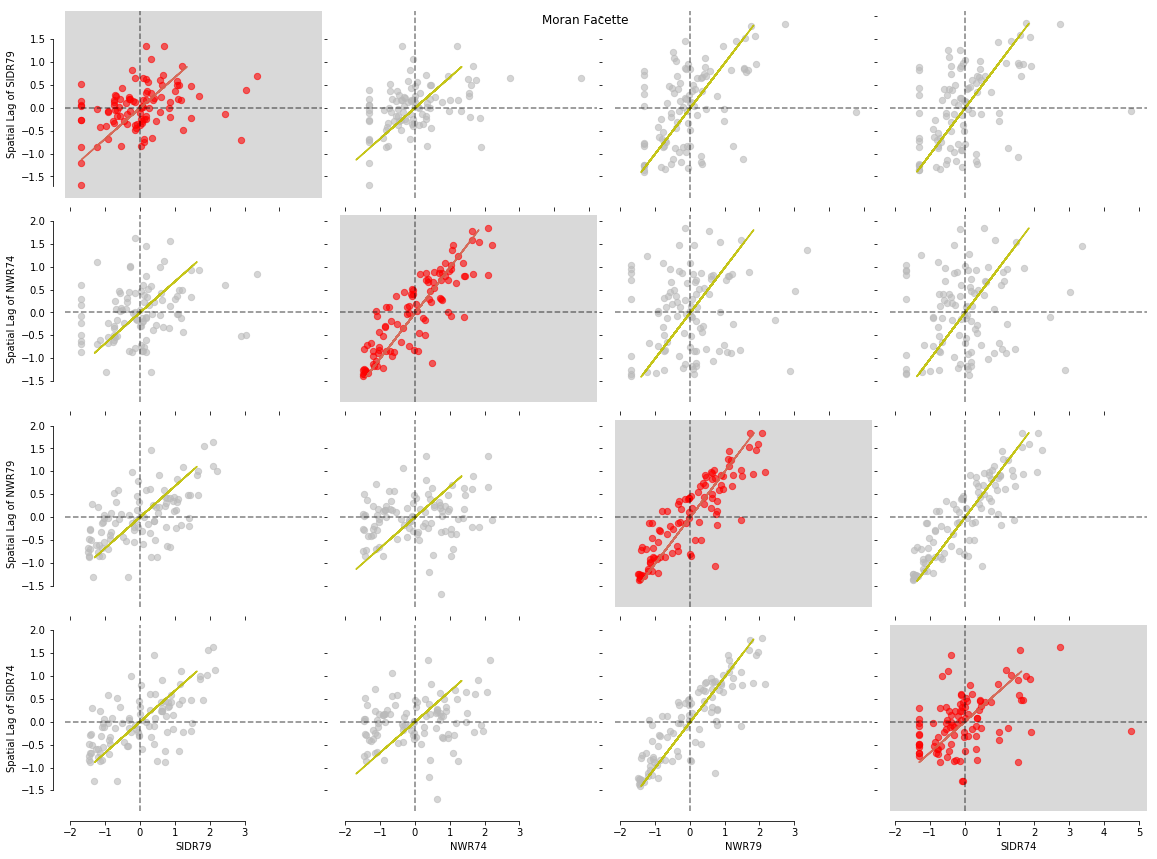

In [16]:
fig, axarr = moran_facette(moran_matrix, scatter_glob_kwds=dict(color='r'),
                           fitline_bv_kwds=dict(color='y'))
plt.show()

### Moran_Tests

In [6]:
import geopandas
from shapely.geometry import Polygon
import random
import matplotlib

In [7]:
link_to_data = examples.get_path('Guerry.shp')
gdf = gpd.read_file(link_to_data)

In [8]:
y = gdf['Donatns'].values
x = gdf['Suicids'].values
w = lp.Queen.from_dataframe(gdf)
w.transform = 'r'

In [9]:
from splot.esda import moran_scatterplot
from esda.moran import (Moran, Moran_BV, Moran_Local,
                        Moran_Local_BV)

In [17]:
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

/Users/steffie/code/splot/splot/_viz_esda_mpl.py:126: UserWarning: `p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects
  'or `Moran_Local_BV` objects')
/Users/steffie/code/splot/splot/_viz_esda_mpl.py:134: UserWarning: `p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects
  fig, ax = _moran_bv_scatterplot(moran_bv=moran, ax=ax,


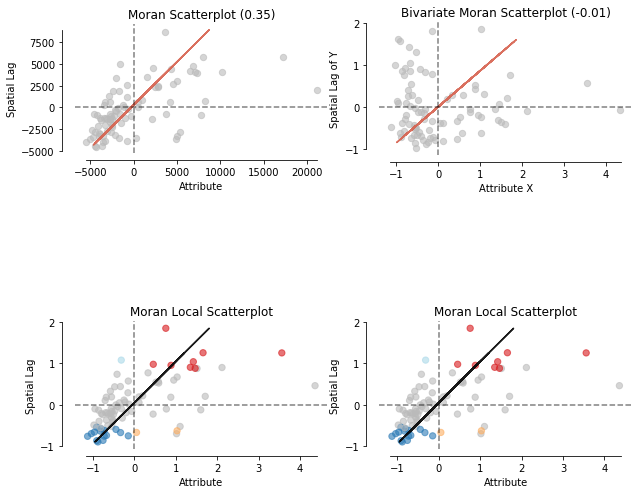

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, p=0.05, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, p=0.05, ax=axs[0,1])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,1])
plt.show()

### VBA

In [12]:
import matplotlib.cm as cm

In [13]:
def value_by_alpha(x, y, gdf, cmap='GnBu'):
    cmap = cm.get_cmap(cmap)
    rgba = cmap(x)
    rgba[:, 3] = y/y.max()
    ax = gdf.plot(color=rgba)
    return fig, ax

(<Figure size 1152x864 with 16 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1066ba198>)

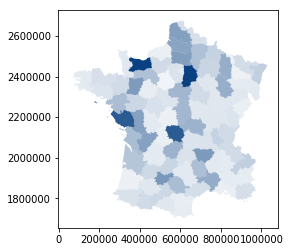

In [14]:
value_by_alpha(x,y,gdf)